In [195]:
# To do 

In [196]:
%pylab inline
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [204]:
data3 = np.loadtxt('dout10001000full.txt')

ids = data3[:,0]
d3 = data3[:,1] # Environment 
NHT = data3[:,2]
NHI = data3[:,3] 

In [217]:
# Why ids != d3 ????
# Why NANs
# Check NH computation for different b and Rvir
print len(set(ids))
print len(set(d3))
print len(set(NHT))

print list((set(ids)))

455
543
190380
[20.0, 23.0, 28.0, 34.0, 37.0, 39.0, 41.0, 43.0, 45.0, 53.0, 57.0, 64.0, 65.0, 71.0, 73.0, 76.0, 78.0, 79.0, 84.0, 85.0, 86.0, 87.0, 89.0, 90.0, 92.0, 94.0, 97.0, 100.0, 102.0, 103.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 115.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 126.0, 127.0, 128.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 141.0, 142.0, 143.0, 145.0, 146.0, 148.0, 151.0, 152.0, 154.0, 157.0, 159.0, 160.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 179.0, 180.0, 181.0, 182.0, 183.0, 186.0, 187.0, 188.0, 190.0, 192.0, 193.0, 194.0, 195.0, 196.0, 199.0, 200.0, 201.0, 205.0, 206.0, 207.0, 210.0, 211.0, 212.0, 213.0, 217.0, 218.0, 220.0, 221.0, 222.0, 223.0, 224.0, 226.0, 228.0, 229.0, 232.0, 233.0, 234.0, 235.0, 236.0, 241.0, 245.0, 248.0, 249.0, 251.0, 252.0, 253.0, 254.0, 256.0, 258.0, 259.0, 260.0, 261.0, 262.0, 264.0, 266.0, 267.0, 268.0, 270.0, 271.0, 272.0, 276

In [180]:
#Selecting halos by environment
index1 = where((~np.isnan(NHI)) & (d3>-1) & (d3<-0.5))
ids1 = ids[index1]
NHT1 = NHT[index1]
NHI1 = NHI[index1]
d31 = d3[index1]

index2 = where((~np.isnan(NHI)) & (d3>-0.5) & (d3<0))
ids2 = ids[index2]
NHT2 = NHT[index2]
NHI2 = NHI[index2]
d32 = d3[index2]

index3 = where((~np.isnan(NHI)) & (d3>0) & (d3<0.5))
ids3 = ids[index3]
NHT3 = NHT[index3]
NHI3 = NHI[index3]
d33 = d3[index3]

index4 = where((~np.isnan(NHI)) & (d3>0.5))
ids4 = ids[index4]
NHT4 = NHT[index4]
NHI4 = NHI[index4]
d34 = d3[index4]

In [191]:
# environments
D31 = list(set(d31))
D32 = list(set(d32))
D33 = list(set(d33))
D34 = list(set(d34))

print len(set(d31))
print len(set(d31))

171
171


In [192]:
NHI1mean = []
NHT1mean = []
d31mean = []

NHI2mean = []
NHT2mean = []
d32mean = []

NHI3mean = []
NHT3mean = []
d33mean = []

NHI4mean = []
NHT4mean = []
d34mean = []

In [193]:
# average for all the directions
for i in D31:
    index = where(i==d31)
    NHI_ = NHI1[index]
    NHT_ = NHT1[index]
    NHmean = average(NHI_) 
    NHTmean = average(NHT_)
    NHI1mean.append(NHmean)
    NHT1mean.append(NHTmean)
    d31mean.append(i)

for i in D32:
    index = where(i==d32)
    NHI_ = NHI2[index]
    NHT_ = NHT2[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI2mean.append(NHmean)
    NHT2mean.append(NHTmean)
    d32mean.append(i)
    
for i in D33:
    index = where(i==d33)
    NHI_ = NHI3[index]
    NHT_ = NHT3[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI3mean.append(NHmean)
    NHT3mean.append(NHTmean)
    d33mean.append(i)

for i in D34:
    index = where(i==d34)
    NHI_ = NHI4[index]
    NHT_ = NHT4[index]
    NHmean = average(NHI_)
    NHTmean = average(NHT_)
    NHI4mean.append(NHmean)
    NHT4mean.append(NHTmean)
    d34mean.append(i)

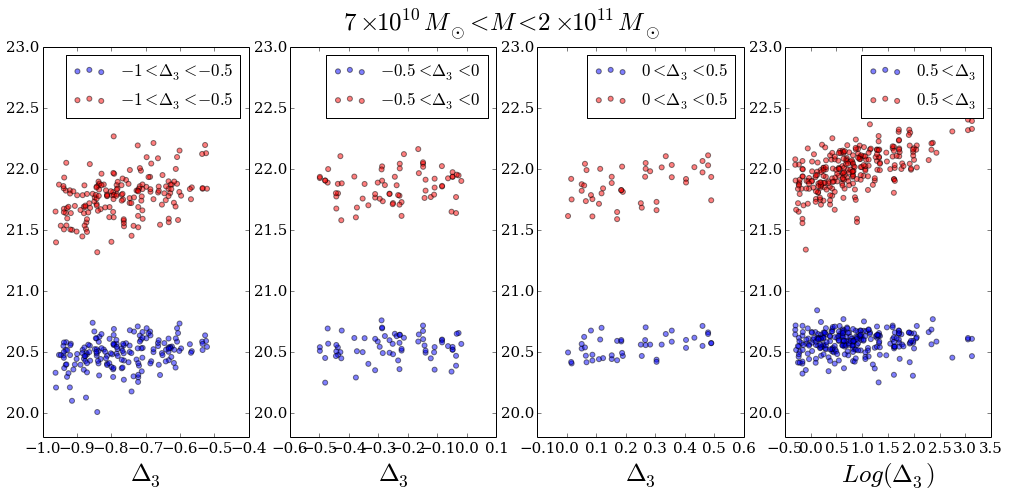

In [206]:
plt.figure(figsize=(17, 7))
plt.suptitle(r'$7 \times 10^{10}M_{\odot} < M <2 \times 10^{11} M_{\odot} $', fontsize=25)
plt.subplot(1, 4, 1)
scatter(d31mean, log10(NHI1mean), s=25, label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
scatter(d31mean, log10(NHT1mean), s=25, c='r', label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(19.8, 23)
plt.subplot(1, 4, 2)
scatter(d32mean, log10(NHI2mean), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5)
scatter(d32mean, log10(NHT2mean), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5, c='r')
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(19.8, 23)
plt.subplot(1, 4, 3)
plt.xlabel('$\Delta_3$', fontsize=25)
scatter(d33mean, log10(NHI3mean), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5)
scatter(d33mean, log10(NHT3mean), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5, c='r')
ylim(19.8, 23)
legend(fontsize=17)
plt.subplot(1, 4, 4)
scatter(log10(d34mean), log10(NHI4mean), s=25, label='$0.5 <\Delta_3  $', alpha=0.5)
scatter(log10(d34mean), log10(NHT4mean), s=25, label='$0.5 <\Delta_3  $', alpha=0.5, c='r')
ylim(19.8, 23)
plt.xlabel('$Log(\Delta_3)$', fontsize=25)
legend(fontsize=17)
savefig('NHINHTvsD3New.png', bbox_inches='tight')

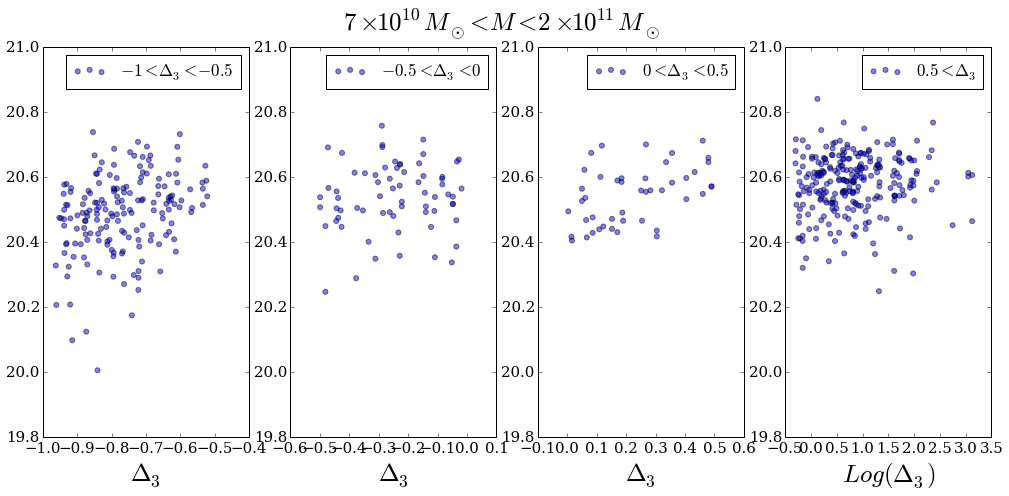

In [208]:
plt.figure(figsize=(17, 7))
plt.suptitle(r'$7 \times 10^{10}M_{\odot} < M <2 \times 10^{11} M_{\odot} $', fontsize=25)
plt.subplot(1, 4, 1)
scatter(d31mean, log10(NHI1mean), s=25, label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
#scatter(d31mean_c, log10(NHT1mean_c), s=25, c='r', label='$-1 <\Delta_3 < -0.5$', alpha=0.5)
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(19.8, 21)
plt.subplot(1, 4, 2)
scatter(d32mean, log10(NHI2mean), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5)
#scatter(d32mean_c, log10(NHT2mean_c), s=25, label='$-0.5 <\Delta_3 < 0$', alpha=0.5, c='r')
plt.xlabel('$\Delta_3$', fontsize=25)
legend(fontsize=17)
ylim(19.8, 21)
plt.subplot(1, 4, 3)
plt.xlabel('$\Delta_3$', fontsize=25)
scatter(d33mean, log10(NHI3mean), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5)
#scatter(d33mean_c, log10(NHT3mean_c), s=25, label='$0 <\Delta_3 < 0.5$', alpha=0.5, c='r')
ylim(19.8, 21)
legend(fontsize=17)
plt.subplot(1, 4, 4)
scatter(log10(d34mean), log10(NHI4mean), s=25, label='$0.5 <\Delta_3  $', alpha=0.5)
#scatter(log10(d34mean_c), log10(NHT4mean_c), s=25, label='$0.5 <\Delta_3  $', alpha=0.5, c='r')
ylim(19.8, 21)
plt.xlabel('$Log(\Delta_3)$', fontsize=25)
legend(fontsize=17)
savefig('NHIvsD3New.png', bbox_inches='tight')

262186
379453.231253 67411.2442909 98609.7645228 243895.513105


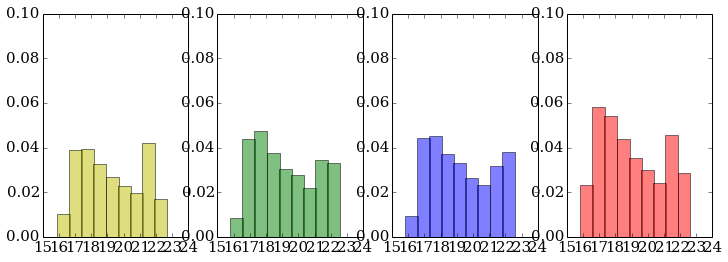

In [216]:
import matplotlib.pyplot as plt
#plt.style.use('bmh')
hist4, bins4 = histogram(log10(NHI4+1),  bins=30)
hist3, bins3 = histogram(log10(NHI3+1),  bins=30)
hist2, bins2 = histogram(log10(NHI2+1),  bins=30)
hist1, bins1 = histogram(log10(NHI1+1),  bins=30)


norm4 =  sum(hist4)*np.diff(bins4)[0]
norm3 =  sum(hist3)*np.diff(bins3)[0]
norm2 =  sum(hist2)*np.diff(bins2)[0]
norm1 =  sum(hist1)*np.diff(bins1)[0]

print max(hist1)

print norm4, norm3, norm2, norm1
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.ylim(0, 0.1)
plt.xlim(15, 24)
bar(bins1[:-1], hist1/norm1, color='y', alpha=0.5) # Divide Number of halos
plt.subplot(1, 4, 2)
plt.ylim(0, 0.1)
plt.xlim(15, 24)
bar(bins2[:-1], hist2/norm2, color='g', alpha=0.5)
plt.subplot(1, 4, 3)
plt.ylim(0, 0.1)
plt.xlim(15, 24)
bar(bins3[:-1], hist3/norm3, color='b', alpha=0.5)
plt.subplot(1, 4, 4)
plt.ylim(0, 0.1)
plt.xlim(15, 24)
bar(bins4[:-1], hist4/norm4, color='r', alpha=0.5)
savefig('histograms.png', bbox_inches='tight')

455 543 1048054


ValueError: x and y must have same first dimension

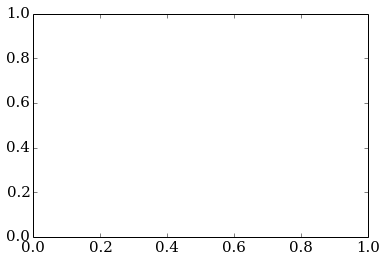

In [187]:
N = [len(list(set(ids1))), len(list(set(ids2))), len(list(set(ids3))), len(list(set(ids4)))]
print len(list(set(ids))), len(list(set(d3))), len(ids)
plot(list(set(d3)), list(set(ids)), lw=2)
ylabel('N halos', fontsize=25)
print sum(N)

In [72]:
bar?

index_clean = np.where((~np.isnan(NHI)) & (d3<0) )#& (log10(NHI)>21))
index_clean2 = np.where((~np.isnan(NHI)) & (d3>0) )#& (log10(NHI)>21)) 
index_clean3 = np.where((~np.isnan(NHI)) & (d3<1) )#& (log10(NHI)>21))


ids_1 = ids[index_clean]
d3_1 = d3[index_clean]
NHT_1 = NHT[index_clean]
NHI_1 = NHI[index_clean]

ids_2 = ids[index_clean2]
d3_2 = d3[index_clean2]
NHT_2 = NHT[index_clean2]
NHI_2 = NHI[index_clean2]

ids_3 = ids[index_clean3]
d3_3 = d3[index_clean3]
NHT_3 = NHT[index_clean3]
NHI_3 = NHI[index_clean3]


print min(d3_3), mean(d3_3), max(d3_3)

print len(d3_3)
dsort = sort(d3_3)
print dsort[80000]

In [6]:
sort(d3)
d3_list = []
lend3 = []

for i in range(len(d3)):
    if d3[i] not in d3_list:
        index = where(d3 == d3[i])
        d3_list.append(d3[i])
        lend3.append(len(index[0]))

In [7]:
high = where(lend3>600)
print high[0]

[0]


In [10]:
index_low = where((d3_3 == min(d3_3)) )
ids_low = ids_3[index_low]
d3_low = d3_3[index_low]
NHT_low = NHT_3[index_low]
NHI_low = NHI_3[index_low]

print len(NHI_low)

index_max = where( (d3_3 == max(d3_3)) )# & (log10(NHT)>21))
ids_max = ids_3[index_max]
d3_max = d3_3[index_max]
NHT_max = NHT_3[index_max]
NHI_max = NHI_3[index_max]

print len(NHI_max)

index_mid = where((d3_3 == 0.355963071138))# & (log10(NHT)>21))
ids_mid = ids_3[index_mid]
d3_mid = d3_3[index_mid]
NHT_mid = NHT_3[index_mid]
NHI_mid = NHI_3[index_mid]

print len(NHI_mid)

187
240
204


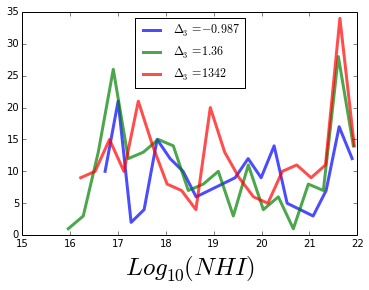

In [11]:
histo1 = histogram(log10(NHI_low), bins=20)
histo2 = histogram(log10(NHI_max), bins=20)
histo3 = histogram(log10(NHI_mid), bins=20)
plot(histo1[1][:-1],histo1[0], lw=3, alpha=0.7, label='$\Delta_3 = -0.987$')
plot(histo3[1][:-1],histo3[0], lw=3, alpha=0.7, label = '$\Delta_3 = 1.36$')
plot(histo2[1][:-1],histo2[0], lw=3, alpha=0.7, label='$\Delta_3 = 1342$')

legend(loc='best')
xlabel('$Log_{10}(NHI)$', fontsize=25)

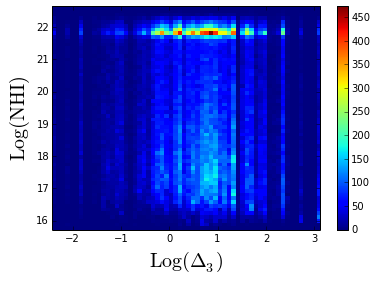

In [12]:
h = hist2d(log10(d3_2), log10(NHI_2), bins=60)
colorbar()
xlabel(r"$\mathrm{Log(\Delta_3)}$", fontsize=20)
ylabel(r"$\mathrm{Log(NHI)}$", fontsize=20)
#h2 = hist2d(d3, log10(NHI), bins=100)
savefig("NHIhistogram.png", bbox_inches='tight')

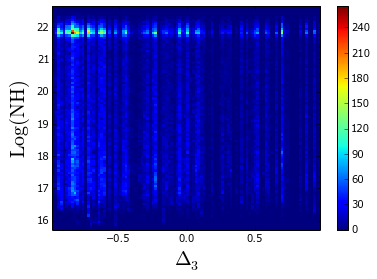

In [105]:
h2 = hist2d(d3_3, log10(NHI_3), bins=100)
colorbar()
xlabel(r"$\mathrm{\Delta_3}$", fontsize=20)
ylabel(r"$\mathrm{Log(NH)}$", fontsize=20)
savefig("NHIall.png", bbox_inches='tight')

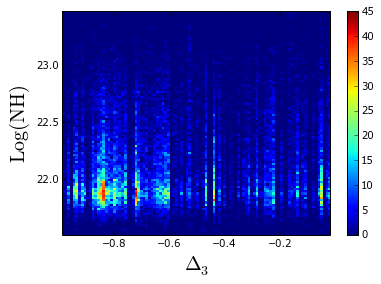

In [44]:
h2 = hist2d(d3_1, log10(NHT_1), bins=100)
colorbar()
xlabel(r"$\mathrm{\Delta_3}$", fontsize=20)
ylabel(r"$\mathrm{Log(NH)}$", fontsize=20)

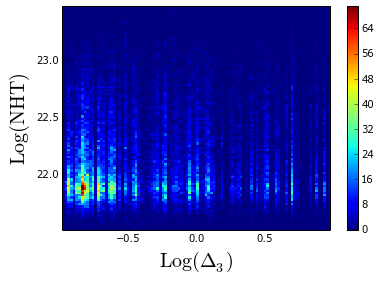

In [45]:
h2 = hist2d(d3_3, log10(NHT_3), bins=100)
colorbar()
xlabel(r"$\mathrm{Log(\Delta_3)}$", fontsize=20)
ylabel(r"$\mathrm{Log(NHT)}$", fontsize=20)
#savefig("NH10000300.png")